In [1]:
import videopipeline as vpl

In [2]:
def add_suffix(path, suffix, new_ext='.mp4'):
    return path.replace('.mp4', f'-{suffix}{new_ext}')

In [3]:
video_path = r"videos/1.mp4"
img_size = (800, 1000)
crop_pos = (200, 800)

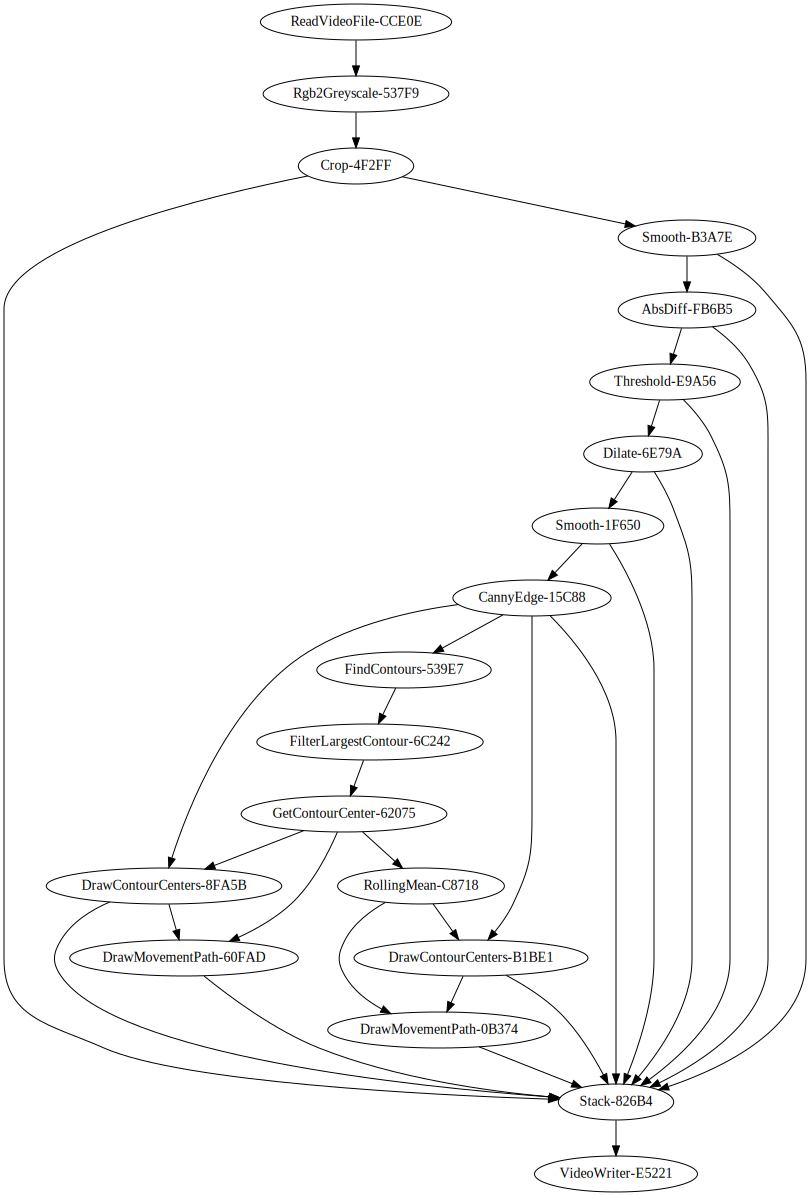

In [4]:
# Pipeline model
raw_video = vpl.generators.ReadVideoFile(video_path)
grey = vpl.functions.Rgb2Greyscale()(raw_video)
crop = vpl.functions.Crop(crop_pos, img_size)(grey)
smooth1 = vpl.functions.Smooth(101)(crop)
abs_diff = vpl.functions.AbsDiff()(smooth1)
threshold = vpl.functions.Threshold(32)(abs_diff)
dilate = vpl.functions.Dilate(150)(threshold)
smooth2 = vpl.functions.Smooth(11)(dilate)
canny_edge = vpl.functions.CannyEdge(1, 200)(smooth2)
find_contours = vpl.functions.FindContours()(canny_edge)

largest_contours = vpl.functions.FilterLargestContour()(find_contours)
contour_center = vpl.functions.GetContourCenter()(largest_contours)

contour_center_drawn1 = vpl.functions.DrawContourCenters()([canny_edge, contour_center])
movement_path_drawn1 = vpl.functions.DrawMovementPath()([contour_center_drawn1, contour_center])

smoothed_center = vpl.functions.RollingMean(5)(contour_center)
contour_center_drawn2 = vpl.functions.DrawContourCenters()([canny_edge, smoothed_center])
movement_path_drawn2 = vpl.functions.DrawMovementPath()([contour_center_drawn2, smoothed_center])

stacked = vpl.functions.Stack(4, 3)([
    crop, smooth1, abs_diff, 
    threshold, dilate, smooth2, 
    canny_edge, contour_center_drawn1, movement_path_drawn1,
    contour_center_drawn2, movement_path_drawn2,
])
writer = vpl.actions.VideoWriter(add_suffix(video_path, "dev"), 
                                 30, 
                                 aggregate=True, 
                                 collect=False, 
                                 verbose=True)(stacked)

p = vpl.core.Pipeline(writer)
p.render_model()

In [5]:
# Run pipeline
_ = p()

Aggregating 0
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 1
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 2
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 3
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 4
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 5
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 6
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 7
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 8
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
pa


Aggregating 72
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 73
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 74
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 75
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 76
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 77
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 78
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 79
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
center1 7
path1 8
center2 9
path2 10

Aggregating 80
crop 0
smooth1 1
diff 2
theshold 3
dilate 4
smooth2 5
canny 6
ce